In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import os

In [2]:
df = pd.read_csv('AMD_original_data.csv')
df_stocks = pd.read_csv('AMD_stocks.csv')

C:\Users\Lamla\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (23,26,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Cleaning option data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386118 entries, 0 to 1386117
Data columns (total 38 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   secid             1386118 non-null  int64  
 1   date              1386118 non-null  object 
 2   symbol            1386118 non-null  object 
 3   symbol_flag       1386118 non-null  int64  
 4   exdate            1386118 non-null  object 
 5   last_date         1263749 non-null  object 
 6   cp_flag           1386118 non-null  object 
 7   strike_price      1386118 non-null  int64  
 8   best_bid          1386118 non-null  float64
 9   best_offer        1386118 non-null  float64
 10  volume            1386118 non-null  int64  
 11  open_interest     1386118 non-null  int64  
 12  impl_volatility   1166644 non-null  float64
 13  delta             1166644 non-null  float64
 14  gamma             1166644 non-null  float64
 15  vega              1166644 non-null  float64
 16  

In [4]:
df.isnull().sum()

secid                     0
date                      0
symbol                    0
symbol_flag               0
exdate                    0
last_date            122369
cp_flag                   0
strike_price              0
best_bid                  0
best_offer                0
volume                    0
open_interest             0
impl_volatility      219474
delta                219474
gamma                219474
vega                 219474
theta                219474
optionid                  0
cfadj                     0
am_settlement             0
contract_size             0
ss_flag                   0
forward_price       1386118
expiry_indicator     947992
root                1386118
suffix              1386118
cusip                     0
ticker                    0
sic                       0
index_flag                0
exchange_d                0
class               1386118
issue_type                0
industry_group      1351152
issuer                    0
div_convention      

In [5]:
# Drop all columns with all missing values
df.dropna(axis=1, how='all', inplace=True)  
print('# of rows in original option data:', len(df))

# Select columns
columns_to_keep = ['date', 'exdate', 'cp_flag', 'strike_price',
                   'best_bid', 'best_offer', 'volume', 'open_interest',
                   'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 
                   'contract_size', 'ticker']
clean_df = df[columns_to_keep].copy()

# Drop rows with Nan values
clean_df.dropna(inplace=True)
print('# of rows after dropping rows with NaN values:', len(clean_df))

# Drop duplicated rows
clean_df.drop_duplicates(inplace=True)
print('# of rows after dropping duplicated rows:', len(clean_df))

# of rows in original option data: 1386118
# of rows after dropping rows with NaN values: 1166644
# of rows after dropping duplicated rows: 1166644


In [6]:
clean_df.isnull().sum()

date               0
exdate             0
cp_flag            0
strike_price       0
best_bid           0
best_offer         0
volume             0
open_interest      0
impl_volatility    0
delta              0
gamma              0
vega               0
theta              0
contract_size      0
ticker             0
dtype: int64

In [7]:
# Convert dates from object to datetime
clean_df['date']= pd.to_datetime(clean_df['date'])
clean_df['exdate']= pd.to_datetime(clean_df['exdate'])

date_range = str(clean_df['date'].dt.date.min()) + ' to ' +str(clean_df['date'].dt.date.max())
print('Date range:', date_range)
print()

# Sort data by date
clean_df = clean_df.sort_values(by='date')

# Convert columns with dtype = object to string
clean_df['cp_flag'] = clean_df['cp_flag'].astype("string")
clean_df['ticker'] = clean_df['ticker'].astype("string")

# clean_df['date']= clean_df['date'].astype("string")
# clean_df['exdate']= clean_df['exdate'].astype("string")
# clean_df['last_date']= clean_df['last_date'].astype("string")

clean_df.info()

Date range: 2022-02-28 to 2023-02-28

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166644 entries, 0 to 1386117
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   date             1166644 non-null  datetime64[ns]
 1   exdate           1166644 non-null  datetime64[ns]
 2   cp_flag          1166644 non-null  string        
 3   strike_price     1166644 non-null  int64         
 4   best_bid         1166644 non-null  float64       
 5   best_offer       1166644 non-null  float64       
 6   volume           1166644 non-null  int64         
 7   open_interest    1166644 non-null  int64         
 8   impl_volatility  1166644 non-null  float64       
 9   delta            1166644 non-null  float64       
 10  gamma            1166644 non-null  float64       
 11  vega             1166644 non-null  float64       
 12  theta            1166644 non-null  float64       
 13  contract_size    11

# Cleaning stock data

In [8]:
df_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,120.309998,124.610001,119.199997,123.339996,123.339996,124666100
1,2022-03-01,122.330002,122.430000,112.800003,113.830002,113.830002,126552200
2,2022-03-02,115.470001,119.480003,113.309998,118.279999,118.279999,118354500
3,2022-03-03,118.129997,118.260002,111.050003,111.980003,111.980003,123916700
4,2022-03-04,112.000000,113.000000,106.809998,108.410004,108.410004,100609400


In [9]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [10]:
df_stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
print('# of rows in original stock data:', len(df_stocks))

# Drop duplicated rows
df_stocks.drop_duplicates(inplace=True)
print('# of rows after dropping duplicated rows:', len(df_stocks))

# of rows in original stock data: 252
# of rows after dropping duplicated rows: 252


In [12]:
df_stocks['Date']= pd.to_datetime(df_stocks['Date'])
df_stocks = df_stocks.rename(columns={"Date": "date"})

date_range2 = str(df_stocks['date'].dt.date.min()) + ' to ' +str(df_stocks['date'].dt.date.max())
print('Date range of dataset 2:', date_range2)

Date range of dataset 2: 2022-02-28 to 2023-02-28


In [13]:
# Select columns
columns_to_keep = ['date','Volume','Adj Close']
df_stocks2 = df_stocks[columns_to_keep].copy()

df_stocks2.head()

,date,Volume,Adj Close
0,2022-02-28,124666100,123.339996
1,2022-03-01,126552200,113.830002
2,2022-03-02,118354500,118.279999
3,2022-03-03,123916700,111.980003
4,2022-03-04,100609400,108.410004


# Merge data and rename columns

In [14]:
print('Date range of AMD option data:', date_range)
print('Date range of AMD stock data:', date_range2)

Date range of AMD option data: 2022-02-28 to 2023-02-28
Date range of AMD stock data: 2022-02-28 to 2023-02-28


In [15]:
merge_df = pd.merge(clean_df, df_stocks2, how = 'outer', on = 'date')
print(len(df_stocks2), len(clean_df), len(merge_df))

merge_df.head()

# The option price is not > offer price and not < bid price.

252 1166644 1166644


,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,contract_size,ticker,Volume,Adj Close
0,2022-02-28,2022-03-04,P,143000,18.30,21.70,1,43,0.919996,-0.931618,0.011129,1.700479,-71.049770,100,AMD,124666100,123.339996
1,2022-02-28,2022-04-01,C,175000,67.60,71.20,0,0,0.617311,0.971667,0.001450,4.667471,-17.247030,100,NVDA,124666100,123.339996
2,2022-02-28,2022-03-18,C,340000,0.09,0.11,36,3696,0.617664,0.009260,0.000746,1.350224,-8.470528,100,NVDA,124666100,123.339996
3,2022-02-28,2022-03-18,C,335000,0.11,0.12,27,1498,0.604171,0.010715,0.000866,1.532018,-9.411985,100,NVDA,124666100,123.339996
4,2022-02-28,2023-03-17,P,120000,4.25,4.95,0,402,0.555605,-0.060572,0.000867,29.967020,-7.738843,100,NVDA,124666100,123.339996


In [16]:
mapper={'volume':'opt_volume', 
        'Open':'stock_open', 
        'High':'stock_high', 
        'Low': 'stock_low', 
        'Close':'stock_close', 
        'Adj Close':'stock_adj_close', 
        'Volume':'stock_volume'}

merge_df = merge_df.rename(columns=mapper)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166644 entries, 0 to 1166643
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   date             1166644 non-null  datetime64[ns]
 1   exdate           1166644 non-null  datetime64[ns]
 2   cp_flag          1166644 non-null  string        
 3   strike_price     1166644 non-null  int64         
 4   best_bid         1166644 non-null  float64       
 5   best_offer       1166644 non-null  float64       
 6   opt_volume       1166644 non-null  int64         
 7   open_interest    1166644 non-null  int64         
 8   impl_volatility  1166644 non-null  float64       
 9   delta            1166644 non-null  float64       
 10  gamma            1166644 non-null  float64       
 11  vega             1166644 non-null  float64       
 12  theta            1166644 non-null  float64       
 13  contract_size    1166644 non-null  int64         
 14  ti

# Calculate additional variables

In [17]:
# Calculate days to expiration
merge_df['dte'] = (merge_df['exdate'] - merge_df['date']).dt.days

# Calculate daily returns
merge_df['daily_returns'] = merge_df['stock_adj_close'].pct_change()

# Calculate volatility (standard deviation of daily returns)
merge_df['volatility'] = np.std(merge_df['daily_returns']) * np.sqrt(252)  # Assuming 252 trading days in a year

In [18]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166644 entries, 0 to 1166643
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   date             1166644 non-null  datetime64[ns]
 1   exdate           1166644 non-null  datetime64[ns]
 2   cp_flag          1166644 non-null  string        
 3   strike_price     1166644 non-null  int64         
 4   best_bid         1166644 non-null  float64       
 5   best_offer       1166644 non-null  float64       
 6   opt_volume       1166644 non-null  int64         
 7   open_interest    1166644 non-null  int64         
 8   impl_volatility  1166644 non-null  float64       
 9   delta            1166644 non-null  float64       
 10  gamma            1166644 non-null  float64       
 11  vega             1166644 non-null  float64       
 12  theta            1166644 non-null  float64       
 13  contract_size    1166644 non-null  int64         
 14  ti

In [19]:
merge_df.describe()

,strike_price,best_bid,best_offer,opt_volume,open_interest,impl_volatility,delta,gamma,vega,theta,contract_size,stock_volume,stock_adj_close,dte,daily_returns,volatility
count,1.166644e+06,1.166644e+06,1.166644e+06,1.166644e+06,1.166644e+06,1.166644e+06,1.166644e+06,1.166644e+06,1.166644e+06,1.166644e+06,1166644.0,1.166644e+06,1.166644e+06,1.166644e+06,1.166643e+06,1.166644e+06
mean,1.590629e+05,2.972666e+01,3.089889e+01,2.282184e+02,1.395106e+03,6.532276e-01,-1.093080e-02,9.271234e-03,1.646618e+01,-1.884714e+01,100.0,8.639347e+07,8.475904e+01,1.663988e+02,-2.348560e-07,8.742262e-03
std,1.073532e+05,5.161338e+01,5.285049e+01,1.626573e+03,3.339289e+03,3.339506e-01,5.886337e-01,1.365108e-02,2.148920e+01,3.203529e+01,0.0,2.900568e+07,1.635851e+01,1.974114e+02,5.507109e-04,5.937094e-14
min,5.000000e+03,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,8.018000e-02,-9.999280e-01,0.000000e+00,5.160000e-04,-1.014567e+03,100.0,2.601890e+07,5.594000e+01,1.000000e+00,-1.386883e-01,8.742262e-03
25%,8.300000e+04,6.300000e-01,8.000000e-01,0.000000e+00,2.000000e+01,4.814620e-01,-4.304412e-01,1.695000e-03,2.109112e+00,-2.116794e+01,100.0,6.655780e+07,7.245000e+01,2.400000e+01,0.000000e+00,8.742262e-03
50%,1.250000e+05,7.850000e+00,8.400000e+00,2.000000e+00,2.430000e+02,5.562720e-01,1.490000e-03,4.514000e-03,7.883527e+00,-9.868769e+00,100.0,8.380670e+07,8.464000e+01,8.000000e+01,0.000000e+00,8.742262e-03
75%,2.050000e+05,3.505000e+01,3.680000e+01,4.100000e+01,1.183000e+03,6.954575e-01,3.862302e-01,1.091800e-02,2.219063e+01,-3.972248e+00,100.0,1.016726e+08,9.693000e+01,2.380000e+02,0.000000e+00,8.742262e-03
max,6.000000e+05,4.825000e+02,4.865500e+02,1.764690e+05,9.757500e+04,2.999406e+00,9.999960e-01,3.568210e-01,1.536658e+02,8.139670e+00,100.0,2.253941e+08,1.233400e+02,8.980000e+02,1.426903e-01,8.742262e-03


In [20]:
merge_df.head()

# calculated daily_returns and volatility -> Not Good

,date,exdate,cp_flag,strike_price,best_bid,best_offer,opt_volume,open_interest,impl_volatility,delta,gamma,vega,theta,contract_size,ticker,stock_volume,stock_adj_close,dte,daily_returns,volatility
0,2022-02-28,2022-03-04,P,143000,18.30,21.70,1,43,0.919996,-0.931618,0.011129,1.700479,-71.049770,100,AMD,124666100,123.339996,4,NaN,0.008742
1,2022-02-28,2022-04-01,C,175000,67.60,71.20,0,0,0.617311,0.971667,0.001450,4.667471,-17.247030,100,NVDA,124666100,123.339996,32,0.0,0.008742
2,2022-02-28,2022-03-18,C,340000,0.09,0.11,36,3696,0.617664,0.009260,0.000746,1.350224,-8.470528,100,NVDA,124666100,123.339996,18,0.0,0.008742
3,2022-02-28,2022-03-18,C,335000,0.11,0.12,27,1498,0.604171,0.010715,0.000866,1.532018,-9.411985,100,NVDA,124666100,123.339996,18,0.0,0.008742
4,2022-02-28,2023-03-17,P,120000,4.25,4.95,0,402,0.555605,-0.060572,0.000867,29.967020,-7.738843,100,NVDA,124666100,123.339996,382,0.0,0.008742


# Corrlation matrices & heat map

In [21]:
columns_corr = ['strike_price','best_bid', 'best_offer', 
                'opt_volume','impl_volatility', 'delta', 
                'gamma', 'vega', 'theta',  
                'stock_adj_close', 'stock_volume', 'dte']
     
data = merge_df[columns_corr]

# Correlation Matrix
corrM = data.corr()
corrM

,strike_price,best_bid,best_offer,opt_volume,impl_volatility,delta,gamma,vega,theta,stock_adj_close,stock_volume,dte
strike_price,1.000000,0.371097,0.371386,-0.029243,-0.027477,-0.308178,-0.285893,0.225218,0.008148,0.150143,0.088609,0.129234
best_bid,0.371097,1.000000,0.999607,-0.068074,0.160610,-0.239636,-0.209406,0.114092,0.085485,0.054105,0.041571,0.230382
best_offer,0.371386,0.999607,1.000000,-0.069285,0.157278,-0.235539,-0.212533,0.127923,0.086149,0.056882,0.043827,0.244470
opt_volume,-0.029243,-0.068074,-0.069285,1.000000,-0.005946,0.013543,0.255489,-0.056413,-0.363506,0.004932,0.015189,-0.093281
impl_volatility,-0.027477,0.160610,0.157278,-0.005946,1.000000,0.042822,-0.257915,-0.316117,-0.151051,-0.055256,0.033338,-0.275867
delta,-0.308178,-0.239636,-0.235539,0.013543,0.042822,1.000000,-0.038030,0.046174,-0.053226,0.012271,-0.037173,0.038772
gamma,-0.285893,-0.209406,-0.212533,0.255489,-0.257915,-0.038030,1.000000,-0.130546,-0.341033,-0.084961,-0.048528,-0.252829
vega,0.225218,0.114092,0.127923,-0.056413,-0.316117,0.046174,-0.130546,1.000000,0.027551,0.162271,0.046439,0.684254
theta,0.008148,0.085485,0.086149,-0.363506,-0.151051,-0.053226,-0.341033,0.027551,1.000000,-0.079912,-0.052297,0.255315
stock_adj_close,0.150143,0.054105,0.056882,0.004932,-0.055256,0.012271,-0.084961,0.162271,-0.079912,1.000000,0.410074,-0.008874


In [22]:
top_pairs = corrM.unstack().sort_values(ascending=False)

top_pairs.value_counts()

 1.000000    12
-0.079912     2
-0.005946     2
-0.008874     2
-0.008934     2
             ..
 0.038772     2
 0.033338     2
 0.027551     2
 0.015189     2
-0.363506     2
Length: 67, dtype: int64

In [23]:
top_pairs2 = top_pairs[23:]            # remove the ones with correlation = 1.0

top_pairs3 = top_pairs2[::2]           # even  - start at the beginning at take every second item
# top_pairs3 = top_pairs2[1::2]        # odd - start at second item and take every second item

top_pairs3[:30]

opt_volume       gamma              0.255489
dte              theta              0.255315
                 best_offer         0.244470
best_bid         dte                0.230382
strike_price     vega               0.225218
vega             stock_adj_close    0.162271
best_bid         impl_volatility    0.160610
best_offer       impl_volatility    0.157278
stock_adj_close  strike_price       0.150143
dte              strike_price       0.129234
best_offer       vega               0.127923
vega             best_bid           0.114092
stock_volume     strike_price       0.088609
best_offer       theta              0.086149
best_bid         theta              0.085485
best_offer       stock_adj_close    0.056882
best_bid         stock_adj_close    0.054105
vega             stock_volume       0.046439
delta            vega               0.046174
best_offer       stock_volume       0.043827
impl_volatility  delta              0.042822
stock_volume     best_bid           0.041571
delta     

In [24]:
bottom_pairs = corrM.unstack().sort_values(ascending=True)

bottom_pairs2 = bottom_pairs[:-23]         # remove the ones with correlation = 1.0
bottom_pairs3 = bottom_pairs2[::2]         # even  - start at the beginning at take every second item
bottom_pairs3[:30]

theta            opt_volume        -0.363506
                 gamma             -0.341033
vega             impl_volatility   -0.316117
strike_price     delta             -0.308178
gamma            strike_price      -0.285893
dte              impl_volatility   -0.275867
impl_volatility  gamma             -0.257915
dte              gamma             -0.252829
best_bid         delta             -0.239636
best_offer       delta             -0.235539
gamma            best_offer        -0.212533
best_bid         gamma             -0.209406
impl_volatility  theta             -0.151051
gamma            vega              -0.130546
opt_volume       dte               -0.093281
gamma            stock_adj_close   -0.084961
theta            stock_adj_close   -0.079912
best_offer       opt_volume        -0.069285
opt_volume       best_bid          -0.068074
vega             opt_volume        -0.056413
impl_volatility  stock_adj_close   -0.055256
delta            theta             -0.053226
theta     

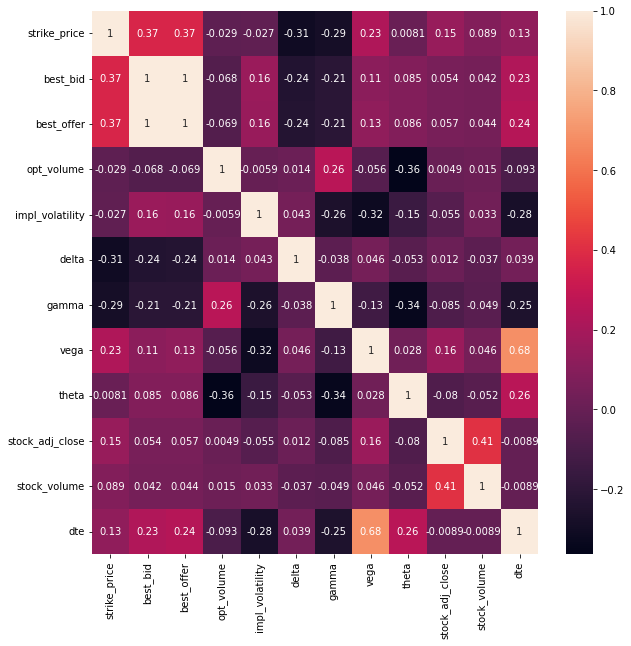

In [25]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corrM, annot=True, ax=ax)
plt.show()

# Training the model

We are predicting 'impl_volatility'. 

In [26]:
# Calculating the correlation of column A against all others
corr_matrix = data.corr()['impl_volatility']

# Sort correlation pairs 
sorted_matrix = corr_matrix.sort_values(ascending = False) 

sorted_matrix

impl_volatility    1.000000
best_bid           0.160610
best_offer         0.157278
delta              0.042822
stock_volume       0.033338
opt_volume        -0.005946
strike_price      -0.027477
stock_adj_close   -0.055256
theta             -0.151051
gamma             -0.257915
dte               -0.275867
vega              -0.316117
Name: impl_volatility, dtype: float64

In [27]:
merge_df.columns

Index(['date', 'exdate', 'cp_flag', 'strike_price', 'best_bid', 'best_offer',
       'opt_volume', 'open_interest', 'impl_volatility', 'delta', 'gamma',
       'vega', 'theta', 'contract_size', 'ticker', 'stock_volume',
       'stock_adj_close', 'dte', 'daily_returns', 'volatility'],
      dtype='object')

## 1. Linear regression

In [45]:
y = merge_df['impl_volatility'].values.reshape(-1,1)
X = data.drop(['impl_volatility'], axis=1)             # can only use numerical data for this model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))

(933315, 11) (933315, 1)
(233329, 11) (233329, 1)


In [46]:
# Normalization of the training and test 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  # subtract each value by the mean of the column and then divide by the stdv of the column
X_test = sc.transform(X_test) 

regressor = LinearRegression()  
regressor.fit(X_train, y_train)      # training the algorithm

print(regressor.intercept_)          # To retrieve the intercept

print(regressor.coef_)               # To retrieve the slope

[0.65322269]
[[-0.04261131 -0.83704611  0.91670179 -0.00383647  0.01451384 -0.13848129
  -0.07372924 -0.08434104 -0.03243469  0.01504714 -0.08196345]]


In [47]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.1683848306557768
Mean Squared Error: 0.0758022609754716
Root Mean Squared Error: 0.2753221040444657
R squared: 0.322211668946512


In [49]:
df_pred_Reg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred_Reg

,Actual,Predicted
0,0.305669,0.262265
1,0.536086,0.624815
2,0.395878,0.398072
3,0.723199,0.693893
4,0.341079,0.433257
...,...,...
233324,0.736459,0.655979
233325,0.456671,0.424099
233326,0.587884,0.744132
233327,0.509322,0.697578


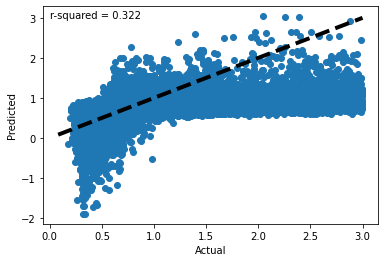

In [48]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.annotate("r-squared = {:.3f}".format(metrics.r2_score(y_test, y_pred)), (0, 3))
plt.show()

In [50]:
print('Prediction range:', np.min(y_pred), np.max(y_pred))
print('Actual range:', np.min(y_test), np.max(y_test))

Prediction range: -1.8989795955128206 3.0390642281435767
Actual range: 0.171003 2.99891


Since all of our *imp_volatility are > 0*, we should not use linear regression. <br>
**LogisticRegression** is not for regression but classification, so we cannot use it either. 

## 2. Negative binomial regression

This link may be useful:
https://timeseriesreasoning.com/contents/negative-binomial-regression-model/


In [34]:
from patsy import dmatrices      
import statsmodels.api as sm

In [35]:
y = merge_df['impl_volatility'].values.reshape(-1,1)
X = merge_df.drop(['impl_volatility'], axis=1)
# X = data.drop(['impl_volatility'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))

(933315, 19) (933315, 1)
(233329, 19) (233329, 1)


In [36]:
# Note: we cannot use string data for this model, so I will not include 'cp_flag' and 'ticker'
expr = """impl_volatility ~ date + exdate + strike_price + best_bid + best_offer + 
        opt_volume + open_interest + impl_volatility + delta + gamma + vega + theta + 
        contract_size + stock_volume + stock_adj_close + dte"""

df_train, df_test = train_test_split(merge_df, test_size=0.2)
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))

(933315, 335) (933315, 1)
(233329, 335) (233329, 1)


In [37]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        impl_volatility   No. Observations:               933315
Model:                            GLM   Df Residuals:                   932987
Model Family:                 Poisson   Df Model:                          327
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.5087e+05
Date:                Sun, 21 Apr 2024   Deviance:                       7818.7
Time:                        22:22:58   Pearson chi2:                 7.65e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

I have never used this type of model before, so I need to study about it more to continue the process. <br>
If you are interested, please look at the link above. 

# 3. Random Forest

In [38]:
y = merge_df['impl_volatility']
X = data.drop(['impl_volatility'], axis=1)           # again, data needs to be numerical, cannot be string or timestamp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))

(933315, 11) (933315,)
(233329, 11) (233329,)


In [39]:
# Normalization of the training and test 
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  # subtract each value by the mean of the column and then divide by the stdv of the column
X_test = sc.transform(X_test) 

regressor = RandomForestRegressor(max_depth=20, n_estimators=10, random_state=0)  # set up random forest
regressor.fit(X_train, y_train)                                                    # train the model

RandomForestRegressor(max_depth=20, n_estimators=10, random_state=0)

In [40]:
y_pred_rf = regressor.predict(X_test)  

print('Mean Absolute Error for Random Forests:', metrics.mean_absolute_error(y_test, y_pred_rf))  
print('Mean Squared Error for Random Forests:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error for Random Forests:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))) 
print('R squared:', metrics.r2_score(y_test, y_pred_rf))

Mean Absolute Error for Random Forests: 0.017671189398626164
Mean Squared Error for Random Forests: 0.0011121129755730578
Root Mean Squared Error for Random Forests: 0.033348357914192085
R squared: 0.9900560064046044


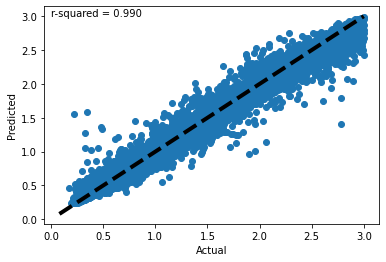

In [41]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.annotate("r-squared = {:.3f}".format(metrics.r2_score(y_test, y_pred_rf)), (0, 3))
plt.show()

In [42]:
# Finding the optimal n_estimators for random forest

# scores =[]
# for k in range(1, 200):
#     rfc = RandomForestRegressor(n_estimators=k)
#     rfc.fit(x_train, y_train)
#     y_pred = rfc.predict(x_test)
#     scores.append(metrics.accuracy_score(y_test, y_pred))

# import matplotlib.pyplot as plt
# %matplotlib inline

# # plot the relationship between K and testing accuracy
# plt.plot(range(1, 200), scores)
# plt.xlabel('Value of n_estimators for Random Forest Classifier')
# plt.ylabel('Testing Accuracy')